In [1]:
from tensorflow import keras
model = keras.models.load_model('C:/Users/mohap/Desktop/RATask/model/vgg')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [203]:
import os
import cv2
import numpy as np
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

labels = ['colon','endometrium_1','endometrium_2','kidney' , 'liver', 'lung','lymph_node','pancreas','skin_2','small_intestine','spleen']

train_path ='C:/Users/mohap/Desktop/RATask/data-20211216T181612Z-006/data/train'
test_path ='C:/Users/mohap/Desktop/RATask/data-20211216T181612Z-006/data/test'
IMG_SIZE = 600
color = 3


training_data = []
testing_data = []
def create_training():
    for label in labels:
        class_num = labels.index(label)
        path = os.path.join(train_path,label) #path to organ tissue
        for img in os.listdir(path):
            if color == 1:
                #grayscale
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                
            else:
                img_array = cv2.imread(os.path.join(path,img))
                
            img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            training_data.append([img_array,class_num])
def create_testing():
    for label in labels:
        class_num = labels.index(label)
        path = os.path.join(test_path,label) #path to organ tissue
        for img in os.listdir(path):
            if color == 1:
                #grayscale
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                
            else:
                img_array = cv2.imread(os.path.join(path,img))
                
            img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            testing_data.append([img_array,class_num])
create_training()   
create_testing()  

In [204]:
X = []
Y = []

for features,label in training_data:
    X.append(features); Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, color)

nsamples, nx, ny, nz = X.shape
d2_train_dataset = X.reshape((nsamples,nx*ny*nz))


features = m.fit_transform(d2_train_dataset)
numpics = [2,3,14,3,1,6,22,1,3,1,4]

#sns.scatterplot(features[:,0], features[:,1])

In [205]:
import pandas as pd
import numpy as np

start = 0; feat = []
for end in numpics:
    feat.append(features[start:start+end])
    start+= end
    
rows = []
for i in range(len(numpics)):
    rows += [labels[i]]*numpics[i]


In [206]:
final = []
for i in range(len(features)):
    new = list(features[i])
    new += [rows[i]]
    final.append(new)

  
df = pd.DataFrame(data=final, columns=["X", "Y","type"])

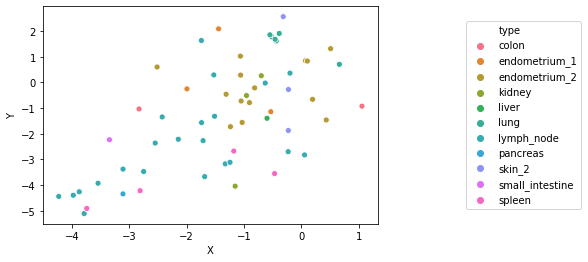

In [208]:
g = sns.scatterplot(data=df, x="X", y="Y", hue="type")
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)